In [15]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

server_IP = 'http://10.100.100.232'
port_fdsn = "8091"
    
starttime = UTCDateTime("2018 03 01 00 00")    
endtime = UTCDateTime("2018 04 01 00 00 00")

client = Client(server_IP+":"+port_fdsn)

sc_cat = client.get_events(starttime=starttime, endtime=endtime,
                           includeallmagnitudes=True, includearrivals=True)

print(sc_cat[0])

Event:	2018-03-31T23:48:11.859999Z |  +8.355,  -77.500 | 2.109435532 MLr | manual

	            resource_id: ResourceIdentifier(id="smi:org.gfz-potsdam.de/geofon/SGC2018gikx")
	             event_type: 'earthquake'
	          creation_info: CreationInfo(agency_id='SGC', author='scevent@seismo1.sgc.gov.co', creation_time=UTCDateTime(2018, 4, 1, 6, 15, 48, 701825))
	    preferred_origin_id: ResourceIdentifier(id="smi:org.gfz-potsdam.de/geofon/Origin#20180401061441.026923.16426")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:org.gfz-potsdam.de/geofon/Magnitude#20180401061446.734459.16437")
	                   ---------
	     event_descriptions: 1 Elements
	                  picks: 19 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements


In [16]:
len(sc_cat)

3139

In [17]:
import obsplus

ev_df = obsplus.events_to_df(sc_cat)

ev_df.head()

,time,latitude,longitude,depth,magnitude,event_description,associated_phase_count,azimuthal_gap,event_id,horizontal_uncertainty,...,standard_error,used_phase_count,stations,station_count,vertical_uncertainty,updated,author,agency_id,creation_time,version
0,1.522540e+09,8.354667,-77.500167,960.0,2.109436,"Panama-Colombia, Region Fronteriza",20.0,95.0,smi:org.gfz-potsdam.de/geofon/SGC2018gikx,NaN,...,1.56000,20.0,"APAC, BCIP, CAP2, DBB, LCBC, PTA, PTB, SJC, SO...",10,7400.0,1.522563e+09,scevent@seismo1.sgc.gov.co,SGC,2018-04-01T06:15:48.701825Z,None
1,1.522540e+09,7.018000,-76.210000,10000.0,0.483113,"Dabeiba - Antioquia, Colombia",NaN,NaN,smi:org.gfz-potsdam.de/geofon/SGC2018giku,NaN,...,3.13527,NaN,DBB,1,NaN,1.522563e+09,scevent@seismo1.sgc.gov.co,SGC,2018-04-01T06:05:05.902012Z,None
2,1.522539e+09,1.957333,-75.781833,43080.0,1.107985,"Suaza - Huila, Colombia",12.0,121.0,smi:org.gfz-potsdam.de/geofon/SGC2018gikm,NaN,...,0.65000,12.0,"BET, CONO, FLO2, GARC, POP2, SOTO",6,7300.0,1.522563e+09,scevent@seismo1.sgc.gov.co,SGC,2018-04-01T06:03:44.050997Z,None
3,1.522538e+09,6.819667,-73.110167,143900.0,1.703956,"Los Santos - Santander, Colombia",24.0,115.0,smi:org.gfz-potsdam.de/geofon/SGC2018gijt,NaN,...,0.97000,24.0,"CRJC, CVER, DRL03, GUY2C, NOR, OCA, PAM, PTB, ...",13,5100.0,1.522562e+09,scevent@seismo1.sgc.gov.co,SGC,2018-04-01T05:56:15.043495Z,None
4,1.522537e+09,5.028500,-77.605667,15880.0,1.729154,Océano Pacífico,12.0,290.0,smi:org.gfz-potsdam.de/geofon/SGC2018gijk,NaN,...,0.39000,12.0,"JAMC, MAL, ORTC, PAL, PIZC, YOT",6,2000.0,1.522561e+09,scevent@seismo1.sgc.gov.co,SGC,2018-04-01T05:44:39.422434Z,None


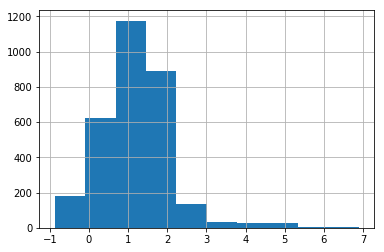

In [18]:
ev_df.magnitude.hist()


In [14]:
picks = obsplus.picks_to_df(sc_cat)
picks.head()

,resource_id,event_id,event_time,phase_hint,onset,polarity,time,network,station,location,...,agency_id,author,backazimuth,creation_time,evaluation_mode,evaluation_status,filter_id,horizontal_slowness,method_id,seed_id
0,smi:org.gfz-potsdam.de/geofon/SEISPICK#2017013...,smi:org.gfz-potsdam.de/geofon/SGC2017cdwz,1.485871e+09,P,None,None,1.485872e+09,CM,BRR,00,...,None,None,NaN,NaN,manual,None,None,NaN,smi:org.gfz-potsdam.de/geofon/manual,CM.BRR.00.HHZ
1,smi:org.gfz-potsdam.de/geofon/SEISPICK#2017013...,smi:org.gfz-potsdam.de/geofon/SGC2017cdwz,1.485871e+09,P,None,None,1.485872e+09,CM,BRR,00,...,None,None,NaN,NaN,manual,None,None,NaN,smi:org.gfz-potsdam.de/geofon/manual,CM.BRR.00.HHN
2,smi:org.gfz-potsdam.de/geofon/SEISPICK#2017013...,smi:org.gfz-potsdam.de/geofon/SGC2017cdwz,1.485871e+09,P,None,None,1.485872e+09,CM,RUS,00,...,None,None,NaN,NaN,manual,None,None,NaN,smi:org.gfz-potsdam.de/geofon/manual,CM.RUS.00.HHZ
3,smi:org.gfz-potsdam.de/geofon/SEISPICK#2017013...,smi:org.gfz-potsdam.de/geofon/SGC2017cdwz,1.485871e+09,P,None,None,1.485872e+09,CM,RUS,00,...,None,None,NaN,NaN,manual,None,None,NaN,smi:org.gfz-potsdam.de/geofon/manual,CM.RUS.00.HHE
4,smi:org.gfz-potsdam.de/geofon/SEISPICK#2017013...,smi:org.gfz-potsdam.de/geofon/SGC2017cdwz,1.485871e+09,P,None,None,1.485872e+09,CM,PTB,00,...,None,None,NaN,NaN,manual,None,None,NaN,smi:org.gfz-potsdam.de/geofon/manual,CM.PTB.00.HHZ
